In [189]:
## Exercise [1]

import numpy as np
import matplotlib.pyplot as plt

In [190]:
# Load file 
box = np.loadtxt('box.txt')

In [191]:
# Extract X, Y, Z coordinates of box in camera coordinates
X = box[:,0]
Y = box[:,1]
Z = box[:,2]

In [192]:
# Translate box 6 m in front of projection point
box_height = 2
box_distance = 5
Z_translated = box[:,2]+box_distance+box_height/2

In [193]:
# Calculate pixel coordinates
c_x,c_y = 320,240
f_x,f_y = 1000,1100

def camera_projection_3D_2_2D(X, Y, Z, c_x, c_y, f_x, f_y):
    u = c_x+f_x*np.divide(X,Z)
    v = c_y+f_y*np.divide(Y,Z)
    return u, v

u,v = camera_projection_3D_2_2D(X,Y,Z_translated,c_x,c_y,f_x,f_y)    

/home/dino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/dino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


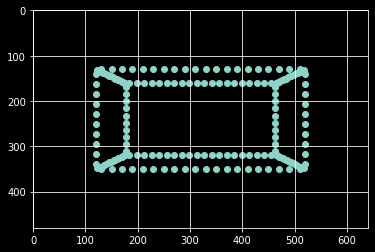

In [201]:
# Plot box
plt.scatter(u,v)
plt.grid(True)
plt.xlim(0,640)
plt.ylim(480,0) 

In [202]:
# Define homogeneous transformation matrices
def T_z(t_z):
    return np.array([ \
    [1, 0,  0,  0], \
    [0, 1,  0,  0], \
    [0, 0,  1,  t_z], \
    [0, 0,  0,  1]])

def R_x(theta):
    return np.array([ \
    [1, 0,              0,               0], \
    [0, np.cos(theta),  -np.sin(theta),  0], \
    [0, np.sin(theta),   np.cos(theta),  0], \
    [0, 0,               0,              1]])     

def R_y(theta):
    return np.array([ \
    [np.cos(theta), 0,  np.sin(theta),  0], \
    [0,             1,  0,              0], \
    [-np.sin(theta),0,  np.cos(theta),  0], \
    [0,             0,  0,              1]])

def R_z(theta):
    return np.array([ \
    [np.cos(theta), -np.sin(theta), 0,  0], \
    [np.sin(theta), np.cos(theta),  0,  0], \
    [0,             0,              1,  0], \
    [0,             0,              0,  1]])
    
# Helper function
def rad2deg(theta):
    return np.pi*theta/180 

In [ ]:
# Plot coordinate frame
def plot_coordinate_frame(T,cx_dist,cy_dist,cx,cy,fx,fy):
    V = T.dot(np.array([ \
    [1,0,0,0], \
    [0,1,0,0], \
    [0,0,1,0], \
    [0,0,0,1]]))

    coordinate_center = T.dot(np.array([[dist_pf/2],[dist_pf/2],[0],[1]]))
    X = coordinate_center[0,0]
    Y = coordinate_center[1,0]
    Z = coordinate_center[2,0]

    ou,ov = camera_projection_3D_2_2D(X,Y,Z,cx,cy,fx,fy)
    origin = [[ou],[ov]]
    
    plt.quiver(*origin, V[0,0:3], -V[1,0:3], V[2,0:3], color=['r','g','b'], scale=5)


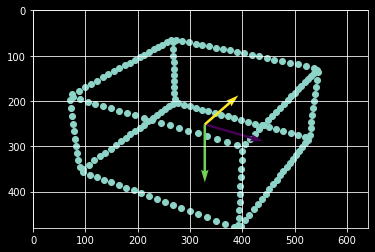

In [203]:
# Rotate and translate box and plot
off_dist = box_distance+box_height/2
T_o = T_z(off_dist).dot(R_x(rad2deg(30))).dot(R_y(rad2deg(30)))
box_rot = T_o.dot(box.transpose())
 
u,v = camera_projection_3D_2_2D(box_rot[0],box_rot[1],box_rot[2],c_x,c_y,f_x,f_y)

# Plot box
plt.scatter(u,v)
plt.grid(True)
plt.xlim(0,640)
plt.ylim(480,0)
plot_coordinate_frame(T_o,0,0,c_x,c_y,f_x,f_y)

In [204]:
## Exercise [2]

# Define platform coordinates
dist_pf = 0.1145  # [m]
pf_coord = np.array([ \
[0, dist_pf,    dist_pf,    0       ], \
[0, 0,          dist_pf,    dist_pf ], \
[0, 0,          0,          0       ], \
[1, 1,          1,          1       ]])

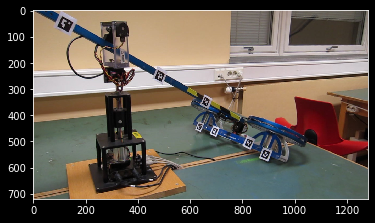

In [205]:
# Load image
img = plt.imread('quanser.jpg')
plt.imshow(img)

In [206]:
# Load platform to camera tranformation matrix
T_p2c = np.loadtxt('heli_pose.txt')

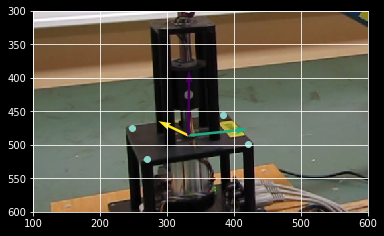

In [207]:
pf_coord_c = T_p2c.dot(pf_coord)
X = pf_coord_c[0,0:4]
Y = pf_coord_c[1,0:4]
Z = pf_coord_c[2,0:4]
u,v = camera_projection_3D_2_2D(X,Y,Z,cx,cy,fx,fy)

plt.scatter(u,v)
plt.grid(True)
plt.imshow(img)
plt.xlim(100,600)
plt.ylim(600,300)
plot_coordinate_frame(T_p2c,dist_pf/2,dist_pf/2,cx,cy,fx,fy)

(600, 300)

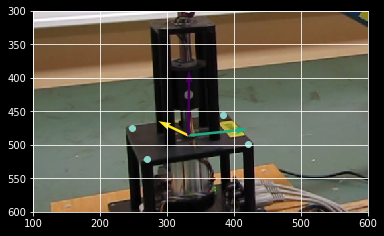

In [182]:
# Plot coordinate frame + quanser
coordinate_center = T_p2c.dot(np.array([[dist_pf/2],[dist_pf/2],[0],[1]]))
X = coordinate_center[0,0]
Y = coordinate_center[1,0]
Z = coordinate_center[2,0]

ou,ov = camera_projection_3D_2_2D(X,Y,Z,cx,cy,fx,fy)
origin = [[ou],[ov]]

V = T_p2c.dot(np.array([ \
[1,0,0,0], \
[0,1,0,0], \
[0,0,1,0], \
[0,0,0,1]]))

plt.scatter(u,v)
plt.grid(True)
plt.imshow(img)
plt.quiver(*origin, V[0,0:3], -V[1,0:3], V[2,0:3], color=['r','g','b'], scale=5)
plt.xlim(100,600)
plt.ylim(600,300)